# Import Library

In [40]:
import pandas as pd
import networkx as nx

## Import data

In [2]:
rawData = pd.read_excel(r'/Users/bkemp/Data Science/Project/Data/Goal1.xlsx','Goal1')
#pd.read_excel(r'filepath.xlsx','Excel sheet name')

In [24]:
rawData;

## Drop rows not needed

In [4]:
rawData.drop(columns=['Goal','Target','SeriesDescription','GeoAreaCode','GeoAreaName','Time_Detail','TimeCoverage','UpperBound','LowerBound','BasePeriod','Source','GeoInfoUrl','FootNote','Nature','Reporting Type','Units'],axis=1,inplace=True)

In [23]:
rawData;

## Pivot Data

In [6]:
Data=rawData.pivot(index='TimePeriod',columns=['Indicator','SeriesCode','Quantile','Location','Age','Sex'],values='Value')

In [22]:
Data;

### Drop columns with less than 3 values (correlation only made with indicators with at least 3 values)

In [8]:
Data.dropna(axis=1,thresh=3,inplace=True)

In [20]:
Data;

## Need to apply sign (+/-) to data

## Create new dataframe

In [12]:
#Getting years from original data
Years=Data.index.values

In [14]:
#Creating first column of new dataframe (to check code works and makes it easier to add new columns)
col1=Data.iloc[:,0]
col1val=col1.values
col1name=col1.name
col1code=col1name[1]+'--'

for n in range(len(col1name)-2):
    if type(col1name[n+2]) == str:
        col1code=col1code+col1name[n+2]+'_'
        
        
cleanData=pd.DataFrame(col1val,index=Years,columns=[[col1name[0]],[col1code]])

In [16]:
#Adding remaining columns to dataframe
for k in range(1,len(Data.columns)-1):
    colname=Data.iloc[:,k].name
    colcode=colname[1]+'--'
    for n in range(len(colname)-2):
        if type(colname[n+2]) == str:
            colcode=colcode+colname[n+2]+'_'
    cleanData[colname[0],colcode]=Data.iloc[:,k].values

In [21]:
cleanData;

## Perform correlation

In [18]:
corrmat=cleanData.corr(method="spearman")

In [25]:
corrmat;

## Perform centrality

In [28]:
G=nx.Graph()

In [31]:
#values
netval=corrmat.values
netval;

In [33]:
#Nodes/Headers
netnodes=corrmat.index
netNode = []

for j in range(0,len(netnodes)):
    netNode.append(netnodes[j][1])

In [35]:
netNode;

In [36]:
#Create network (values above 0.6 correlation)
for m in range(0,len(netNode)):
    for n in range(1+m,len(netNode)):
        if netval[m,n]>0.6:
            G.add_edge(netNode[m],netNode[n],weight=netval[m,n])
G.edges(data=True)

EdgeDataView([('SI_POV_DAY1--', 'SI_POV_EMP1--25+_', {'weight': 0.9946348652168627}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_BOTHSEX_', {'weight': 0.9964285714285714}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_BOTHSEX_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_FEMALE_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_FEMALE_', {'weight': 0.9982126884730385}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_', {'weight': 0.991057041960687}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_MALE_', {'weight': 0.9821428571428571}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15+_MALE_', {'weight': 0.9955321222799309}), ('SI_POV_DAY1--', 'SI_POV_EMP1--25+_MALE_', {'weight': 0.9946348652168627}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_BOTHSEX_', {'weight': 0.9865955682199674}), ('SI_POV_DAY1--', 'SI_POV_EMP1--15-24_FEMALE_', {'weight': 0.991057041960687}), ('SI_POV_EMP1--25+_', 'SI_POV_EMP1--25+_BOTHSEX_', {'wei

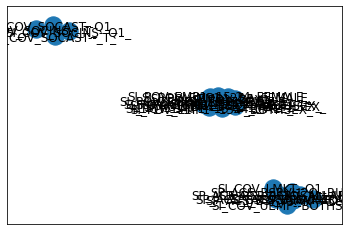

In [37]:
nx.draw_networkx(G,with_labels=True)

In [39]:
nx.eigenvector_centrality(G,weight='weight',max_iter=1000,tol=1e-6)

{'SI_POV_DAY1--': 0.27648525965922566,
 'SI_POV_EMP1--25+_': 0.27759766999678986,
 'SI_POV_EMP1--25+_BOTHSEX_': 0.2775447060963596,
 'SI_POV_EMP1--15+_': 0.27770884925533,
 'SI_POV_EMP1--15+_BOTHSEX_': 0.27770884925533,
 'SI_POV_EMP1--15+_FEMALE_': 0.27770884925533,
 'SI_POV_EMP1--25+_FEMALE_': 0.2776343691542247,
 'SI_POV_EMP1--15-24_': 0.2773888456828404,
 'SI_POV_EMP1--15-24_MALE_': 0.276160805237234,
 'SI_POV_EMP1--15+_MALE_': 0.27770884925533,
 'SI_POV_EMP1--25+_MALE_': 0.2775976699967898,
 'SI_POV_EMP1--15-24_BOTHSEX_': 0.2769120943085364,
 'SI_POV_EMP1--15-24_FEMALE_': 0.27738884568284045,
 'SI_COV_LMKT--Q1_': 1.4363934569770736e-06,
 'SP_ACS_BSRVH2O--RURAL_': 2.387287109356473e-06,
 'SP_ACS_BSRVH2O--ALLAREA_': 2.3531740975297934e-06,
 'SP_ACS_BSRVSAN--RURAL_': 2.3873959900522186e-06,
 'SP_ACS_BSRVSAN--ALLAREA_': 2.3873970981694833e-06,
 'SP_ACS_BSRVSAN--URBAN_': 2.3845760374189126e-06,
 'SI_COV_SOCAST--_T_': 4.600406948054038e-11,
 'SI_COV_SOCAST--Q1_': 4.600406948054038e-11,
 